# Введение в глубинное обучение, ФКН ВШЭ

## Домашнее задание 2. Классификация изображений. Сверточные нейронные сети.

### Общая информация

Дата выдачи: 07.11.2021

Мягкий дедлайн: 23:59MSK 05.12.2021

Жесткий дедлайн: 23:59MSK 05.12.2021

Оценка после штрафа после мягкого дедлайна вычисляется по формуле $M_{penalty} = M_{full} \cdot 0.85^{t/1440}$, где $M_{full}$ — полная оценка за работу без учета штрафа, а $t$ — время в минутах, прошедшее после мягкого дедлайна (округление до двух цифр после запятой). Таким образом, спустя первые сутки после мягкого дедлайна вы не можете получить оценку выше 8.5, а если сдать перед самым жестким дедлайном, то ваш максимум — 5.22 балла.

### Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=0).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

## Задание 1. (Максимум 10 баллов + 5 бонусных баллов)

__Необходимо выполнить любое из двух заданий (на выбор)__

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 

Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

Необходимо написать функции `train_one_epoch`, `train` и `predict` по шаблонам ниже (во многом повторяют примеры с семинаров). Обратите особое внимание на функцию `predict`: она должна возвращать список лоссов по всем объектам даталоадера, список предсказанных классов для каждого объекта из даталоалера и список настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам. Если вы выполнили оба задания, то берется максимум из двух оценок.

__Бонус__. Вы получаете 5 бонусных баллов если справляетесь с обоими заданиями на 10 баллов (итого 15 баллов). В противном случае выставляется максимальная из двух оценок и ваш бонус равен нулю.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 45 минут обучения.
 
Good luck & have fun! :)

### Подготовка

#### Подключение библиотек

In [1]:
import numpy as np
import torch
import torchvision as tv
from torchvision import transforms as T
from tqdm.notebook import tqdm
from torch import nn
from torch.nn import functional as F
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random
from copy import deepcopy

In [2]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2021-12-05 19:46:01--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2021-12-05 19:46:01--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0a5dc612724992159fe02213f9.dl.dropboxusercontent.com/cd/0/get/BbTnHSi5K4mK2BiAA_EZMoLg_XiMic-4J2RNuX_2wBlWDrXQ13LFGlzcJQxL0ExOR6Ue01hnKDgCO8XgXqypSBBe4cdhyBl_xgQ991ntP5dFP_VkIcyYKtYYIgHpYuWVfG60FYZHoMQTM6xMCuZK2T4K/file?dl=1# [following]
--2021-12-05 19:46:01--  https://uc0a5dc612724992159fe02213f9.dl.dropboxusercontent.com/cd/0/get/BbTnHSi5K4mK2BiAA_EZMoLg_XiMic-4J2RNuX_2wBlWDrXQ13LFGlzcJQxL0ExOR6Ue01hnKDgCO8XgXqypSBBe4cd

#### Подготовка данных

In [3]:
train_transform = T.Compose([
    T.RandomCrop(64, padding=4),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

val_transform = T.Compose([
    T.ToTensor(),
    T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

train_set = tv.datasets.ImageFolder("./dataset/dataset/train", transform=train_transform)
val_set = tv.datasets.ImageFolder("./dataset/dataset/val", transform=val_transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, pin_memory=True, num_workers=4, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=32, pin_memory=True, num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [4]:
# Just very simple sanity checks
assert isinstance(train_set[0], tuple), 'Not a tuple'
assert len(train_set[0]) == 2, 'Len element != 2'
assert isinstance(train_set[1][1], int), 'Target isn\'t int'
print("tests passed")

tests passed


#### Модели.

In [5]:
# Sem 2-3 194
class ConvNet(nn.Module):
    def __init__(self, in_channels=3):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
        )
        
        self.head = nn.Sequential(
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 200)
        )
        
    def forward(self, images):
        features = self.features(images)
        features = features.mean(dim=(2, 3))
        logits = self.head(features)
        return logits

    
class BigConvNet(ConvNet):
    def __init__(self, in_channels=3):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
        )
        
        self.head = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 200)
        )


class HugeConvNet(ConvNet):
    def __init__(self, in_channels=3):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels, 3, kernel_size=5, padding=1),
            nn.MaxPool2d(2),
            nn.Conv2d(3, 16, kernel_size=5, padding=1),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=5, padding=1),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=5, padding=1),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
        )
        
        self.head = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 200),
        )


class HugestConvNet(nn.Module):
    def __init__(self, in_channels=3):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels, 3, kernel_size=10, padding=9),
            nn.MaxPool2d(2),
            nn.Conv2d(3, 16, kernel_size=10, padding=4),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=5, padding=4),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=5, padding=4),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=2),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 128, kernel_size=3, padding=2),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 128, kernel_size=2, padding=1),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 256, kernel_size=2, padding=1),
            nn.MaxPool2d(2),
            # nn.BatchNorm2d(256),
        )
        
        self.head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256, 256),
            nn.Dropout(0.1),
            nn.ReLU(),
            nn.Linear(256, 200),
        )
    
    def forward(self, images):
        features = self.features(images)
        logits = self.head(features)
        return logits

##### Like GoogleConvNet.

In [61]:
class SomeGoogleNet(nn.Module):
    def __init__(self, in_channels=3):
        super().__init__()
        self.batch_norm = nn.Sequential(
            nn.BatchNorm2d(in_channels),
        )

        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels, 2, kernel_size=5, padding=5),
            nn.MaxPool2d(2),
            nn.Conv2d(2, 3, kernel_size=5, padding=4),
            nn.MaxPool2d(2),
            nn.Conv2d(3, 3, kernel_size=5, padding=4),
            nn.MaxPool2d(2),
            nn.Conv2d(3, 4, kernel_size=5, padding=3),
            nn.MaxPool2d(2),
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(4, 8, kernel_size=4, padding=3),
            nn.MaxPool2d(2),
            nn.Conv2d(8, 8, kernel_size=4, padding=3),
            nn.ReLU(),
            nn.Conv2d(8, 16, kernel_size=4, padding=3),
            nn.ReLU(),
            nn.Conv2d(16, 4, kernel_size=4, padding=3),
            nn.MaxPool2d(2),
            nn.Conv2d(4, 4, kernel_size=3, padding=1),
            nn.ReLU(),
        )

        self.flat = nn.Sequential(
            nn.MaxPool2d(2),
            nn.Flatten(),
        )

        self.head = nn.Sequential(
            nn.Linear(36, 128),
            nn.Dropout(0.1),
            nn.ReLU(),
            nn.Linear(128, 200),
        )

    
    def forward(self, images):
        batch = self.batch_norm(images)
        features_1 = self.block_1(batch)
        features_2 = self.block_2(features_1)
        features_all = self.flat(features_1 + features_2)
        logits = self.head(features_all)
        return logits

#### Вспомогательные функции.

In [7]:
def PlotImg(img):
    plt.imshow(img.to(torch.int32))
    plt.show()

def SetRandomSeed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

def SetupDevice():
    return torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

# У себя же из 1 домашки код взял. Из него сделал класс.
class GradTrainer:
    def __init__(self, model, device, optimizer, criterion,
                 scheduler=None, cnt_epochs=2, is_lr_const=False):
        self.model = model
        self.optimizer = optimizer
        self.criterion = criterion
        self.device = device
        self.scheduler = scheduler
        self.ClearData()
        self.epoch = 1
        self.start_epoch = 1
        self.end_epoch = cnt_epochs
        self.is_lr_const = is_lr_const
        self.best_accuracy = 0
        self.best_model = deepcopy(self.model)
    

    def _SaveIfBest(self):
        if self.test_accuracies[-1] > self.best_accuracy:
            self.best_model = deepcopy(self.model)


    def _Drop(array_1, array_2):
        array_1 = []
        array_2 = []

    
    def MakePlotOverEpochs(self, ax, train, test, name):
        if len(train) == len(test):
            GradTrainer._Drop(train, test)

        rang = range(1, self.epoch + 1)
        if len(rang) != len(test):
            rang = range(1, len(test) + 1)
        ax.plot(rang, train, label='train')
        ax.plot(rang, test, label='test')
        ax.set_title(name + ' over epochs')
        ax.set_ylabel(name)
        ax.grid()
        ax.set_xlabel('epoch')
        ax.legend()
        return ax

    
    def PlotLosses(self):
        clear_output()
        _, axs = plt.subplots(1, 2, figsize=(16, 8))
        self.MakePlotOverEpochs(axs[0], self.train_losses, self.test_losses, 'Loss')
        self.MakePlotOverEpochs(axs[1], self.train_accuracies, self.test_accuracies, 'Accuracy')
        plt.show()
        

    def ClearData(self):
        self.train_losses = []
        self.test_losses = []
        self.train_accuracies = []
        self.test_accuracies = []


    def _SaveLossAndAccuracy(self, loss, predicted_labels, true_labels, is_train=False):                              
        accuracy = accuracy_score(predicted_labels.cpu(), true_labels.cpu())
        if is_train:
            self.train_losses += [loss]
            self.train_accuracies += [accuracy]
            return

        self.test_losses += [loss]
        self.test_accuracies += [accuracy]

        
    def _TrainPredict(self, data, labels):
        if self.is_lr_const:
            self.optimizer = torch.optim.Adam(self.model.parameters(), lr=5e-3)
        self.optimizer.zero_grad()
        outputs = self.model(data)
        loss = self.criterion(outputs, labels)
        loss.backward()
        self.optimizer.step()

        return outputs, loss

    def _TestPredict(self, data, labels):
        with torch.no_grad():
            outputs = self.model(data)
            loss = self.criterion(outputs, labels)
        return outputs, loss


    def _TrainOrTest(self, loader, is_train=False, is_saving=True):
        true_labels = torch.Tensor().to(self.device)
        predicted = torch.Tensor().to(self.device)
        name = 'Training' if is_train else 'Testing'
        running_loss = 0.0
        for data, labels in tqdm(loader, desc=name + f' {self.epoch}/{self.end_epoch}'):
            data = data.to(self.device)
            labels = labels.to(self.device)
            true_labels = torch.cat((labels, true_labels))

            outputs, loss = self._TrainPredict(data, labels) if is_train else self._TestPredict(data, labels)

            predicted = torch.cat((outputs, predicted))

            if loss.item() != np.inf:
                running_loss += loss.item() * data.shape[0]

        loss = running_loss / len(loader.dataset)
        predict_labels = torch.argmax(predicted, dim=1)
        
        if is_saving:
            self._SaveLossAndAccuracy(loss, predict_labels, true_labels, is_train)

        return loss, predict_labels, true_labels
    

    def Train(self, data_loader):
        return self._TrainOrTest(data_loader, is_train=True)
    

    def Test(self, data_loader, is_saving=False):
        return self._TrainOrTest(data_loader, is_train=False, is_saving=is_saving)
    

    def TestAndTrainOnce(self, train_loader, test_loader):
        self.Train(train_loader)
        self.Test(test_loader, is_saving=True)
        self._SaveIfBest()
        if self.scheduler is not None:
            self.scheduler.step()
    

    def DoTestAndTrain(self, train_loader, test_loader):
        if self.start_epoch > self.end_epoch:
            return
        for self.epoch in range(self.start_epoch, self.end_epoch + 1):
            self.TestAndTrainOnce(train_loader, test_loader)
            self.PlotLosses()
            if self.is_lr_const and len(self.train_losses) > 1:
                self.is_lr_const = (self.train_losses[-2] > self.train_losses[-1] or
                                    self.train_losses[-1] < 1.5)

        self.start_epoch = self.end_epoch + 1

In [8]:
SetRandomSeed(997)

### Обучение модели, запуски экспериментов для 1 задачи.



#### Тест

In [ ]:
seed = SetRandomSeed(111)
device = SetupDevice()
model = ConvNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)
criterion = nn.CrossEntropyLoss()
scheduler = None # torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
trainer = GradTrainer(model, device, optimizer, criterion, scheduler, cnt_epochs=10)

Простой тест на проверку правильности написанного кода

In [ ]:
all_losses, predicted_labels, true_labels = trainer.Test(val_loader)
assert len(predicted_labels) == len(val_set)
accuracy = accuracy_score(predicted_labels.cpu(), true_labels.cpu())
print("tests passed")

Testing 1/10:   0%|          | 0/40 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


tests passed


#### Эксперемент 1.


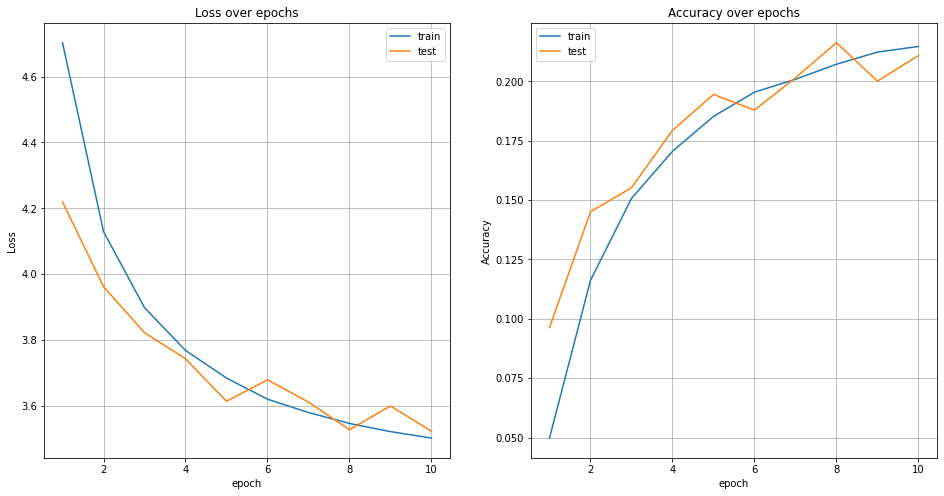

In [ ]:
trainer.DoTestAndTrain(train_loader, val_loader)

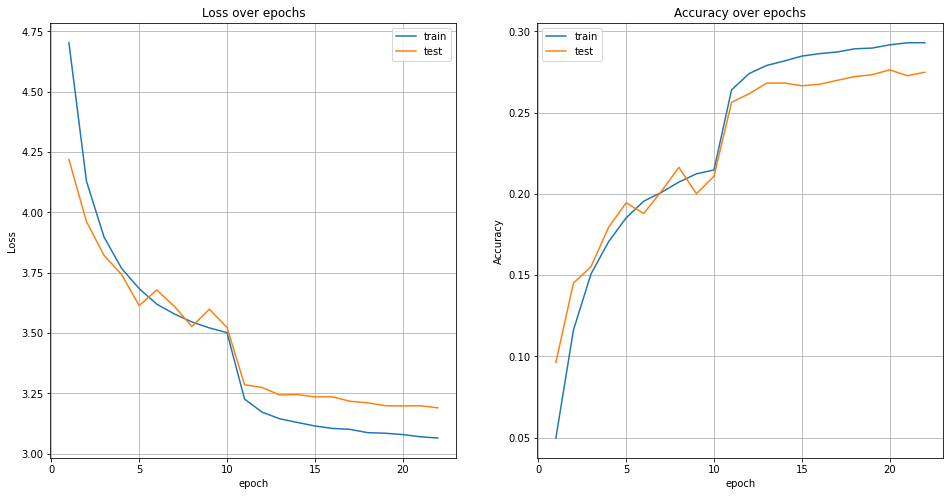

In [ ]:
for _ in range(3):
    trainer.end_epoch += 3
    trainer.optimizer = torch.optim.Adam(trainer.model.parameters(), lr=5e-4)
    trainer.DoTestAndTrain(train_loader, val_loader)

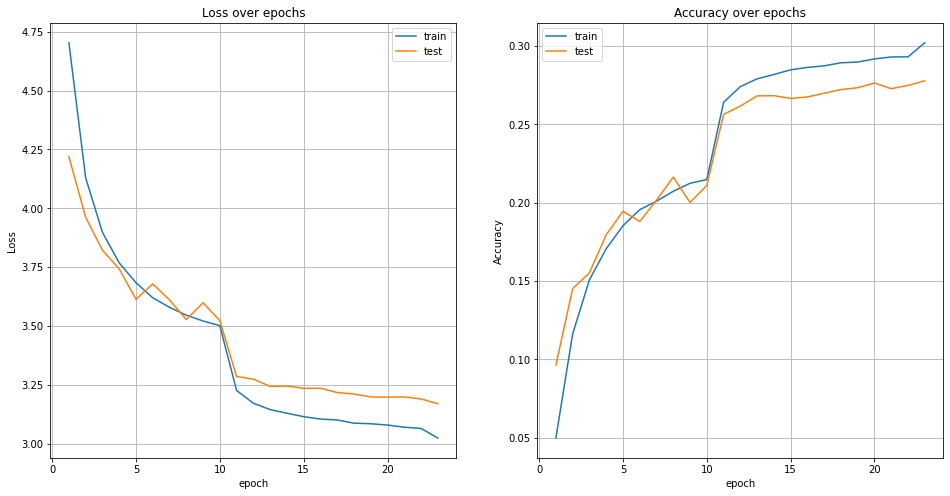

In [ ]:
trainer.end_epoch += 1
trainer.optimizer = torch.optim.Adam(trainer.model.parameters(), lr=5e-5)
trainer.DoTestAndTrain(train_loader, val_loader)

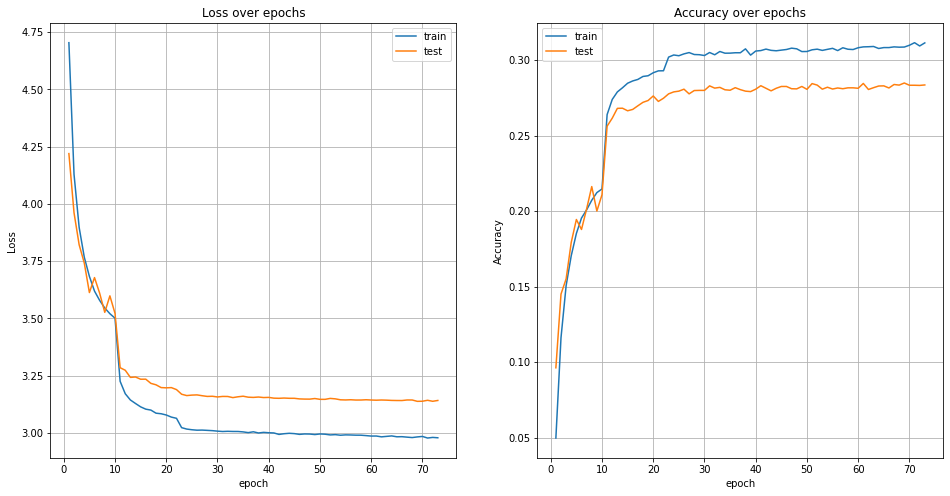

In [ ]:
trainer.end_epoch += 50
trainer.DoTestAndTrain(train_loader, val_loader)

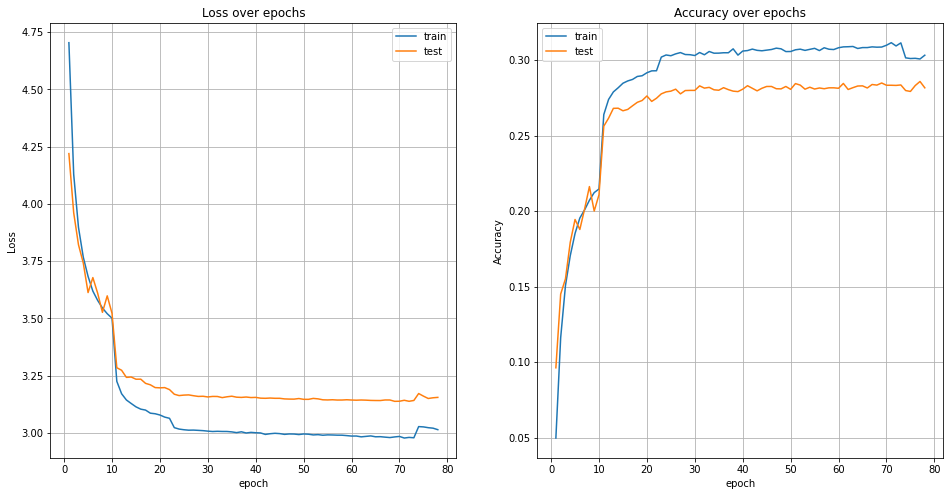

Training 79/79:   0%|          | 0/391 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


KeyboardInterrupt: ignored

In [ ]:
for _ in range(20):
    trainer.end_epoch += 3
    trainer.optimizer = torch.optim.Adam(trainer.model.parameters(), lr=5e-4)
    trainer.DoTestAndTrain(train_loader, val_loader)

#### Эксперемент 2.

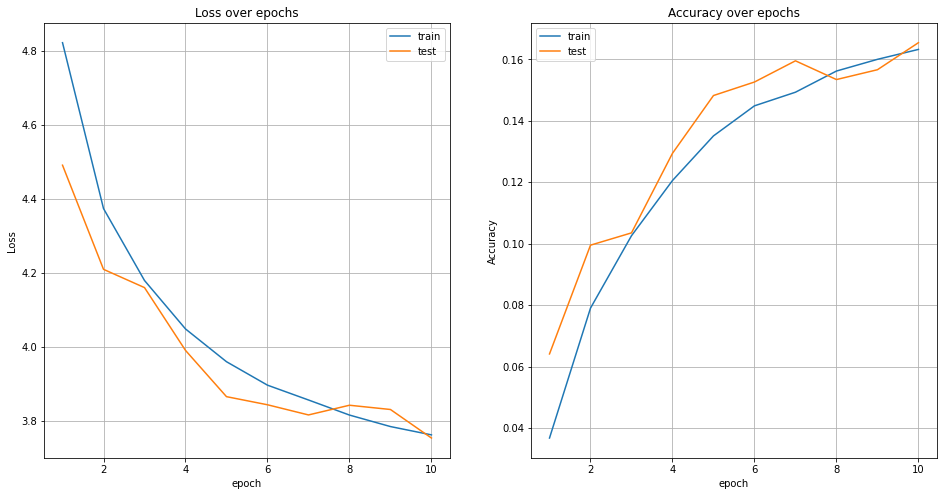

In [ ]:
model_ = BigConvNet().to(device)
optimizer = torch.optim.Adam(model_.parameters(), lr=5e-3)
trainer_2 = GradTrainer(model_, device, optimizer, criterion, scheduler, cnt_epochs=n_epochs)
trainer_2.DoTestAndTrain(train_loader, val_loader)

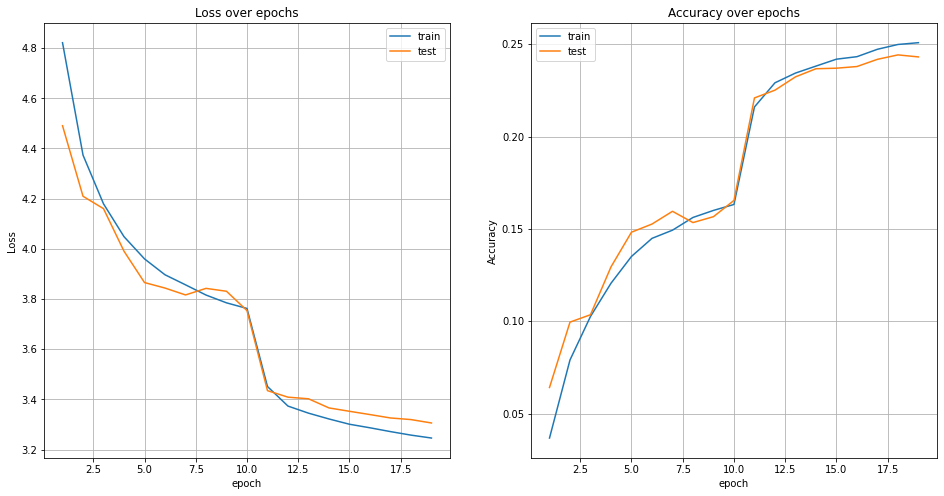

In [ ]:
for _ in range(3):
    trainer_2.end_epoch += 3
    trainer_2.optimizer = torch.optim.Adam(trainer_2.model.parameters(), lr=5e-4)
    trainer_2.DoTestAndTrain(train_loader, val_loader)

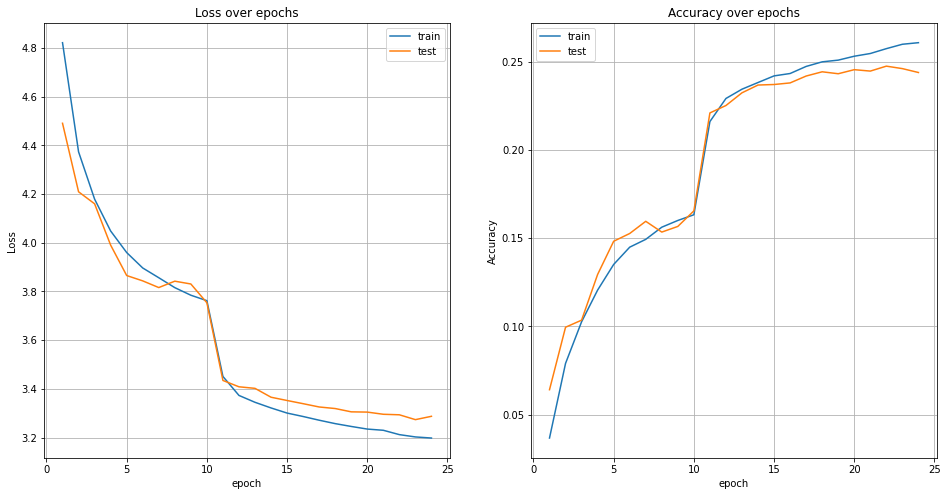

In [ ]:
trainer_2.end_epoch += 5
trainer_2.DoTestAndTrain(train_loader, val_loader)

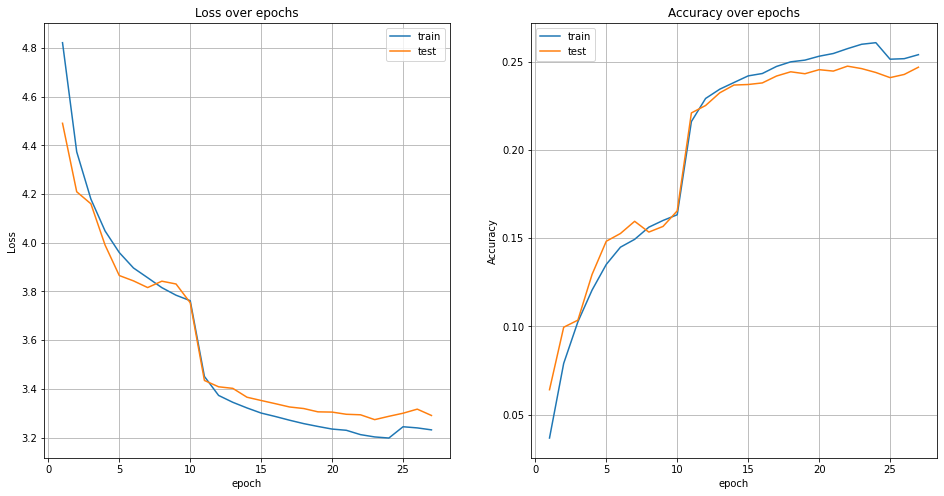

In [ ]:
for _ in range(3):
    trainer_2.end_epoch += 1
    trainer_2.optimizer = torch.optim.Adam(trainer_2.model.parameters(), lr=1e-3)
    trainer_2.DoTestAndTrain(train_loader, val_loader)

#### Эксперемент 3.

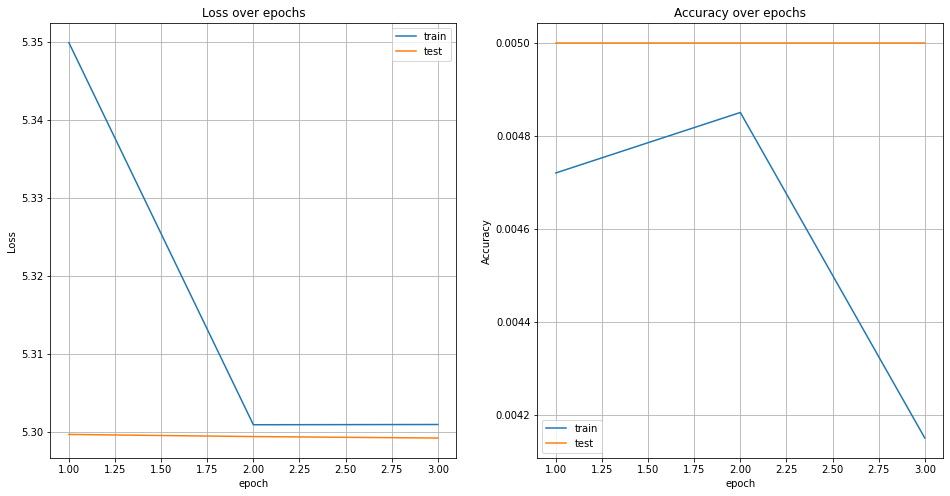

In [ ]:
model = BigConvNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
trainer_3 = GradTrainer(model, device, optimizer, criterion, scheduler, cnt_epochs=3)
trainer_3.DoTestAndTrain(train_loader, val_loader)

#### Эксперемент 4.


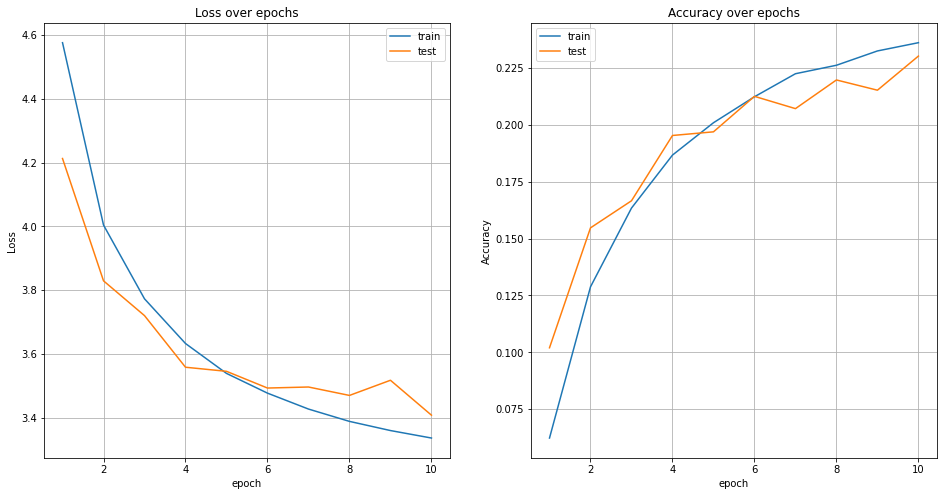

In [ ]:
train_load_32 = torch.utils.data.DataLoader(train_set, batch_size=32, pin_memory=True, num_workers=4, shuffle=True)
val_load_32 = torch.utils.data.DataLoader(val_set, batch_size=32, pin_memory=True, num_workers=4)
model_ = BigConvNet().to(device)
optimizer = torch.optim.Adam(model_.parameters(), lr=1e-3)
trainer_4 = GradTrainer(model_, device, optimizer, criterion, cnt_epochs=10)
trainer_4.DoTestAndTrain(train_load_32, val_load_32)

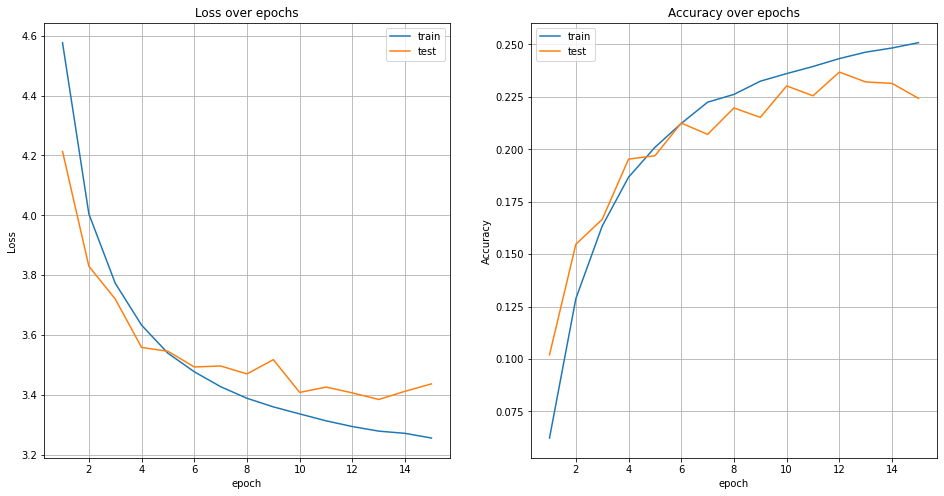

In [ ]:
trainer_4.end_epoch += 5
trainer_4.DoTestAndTrain(train_load_32, val_load_32)

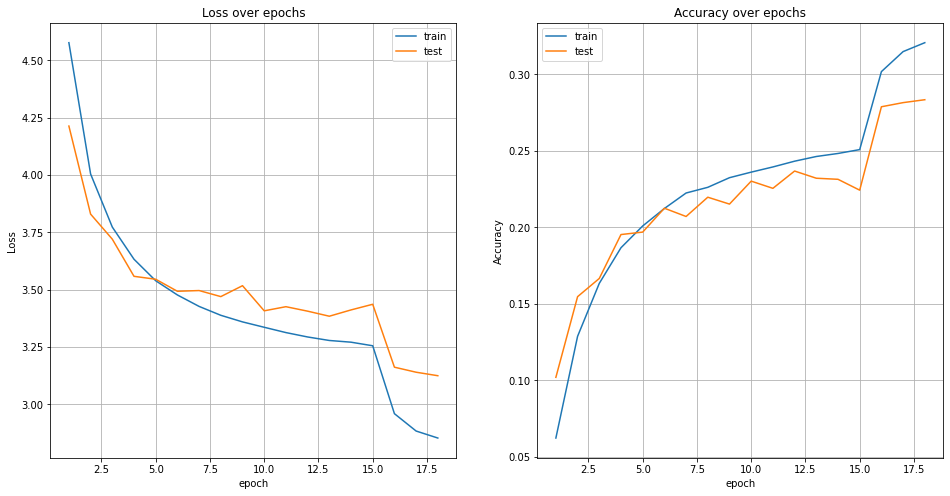

In [ ]:
for _ in range(3):
    trainer_4.end_epoch += 1
    trainer_4.optimizer = torch.optim.Adam(trainer_4.model.parameters(), lr=1e-4)
    trainer_4.DoTestAndTrain(train_loader, val_loader)
    if trainer_4.test_accuracies[-1] > 0.45:
        break

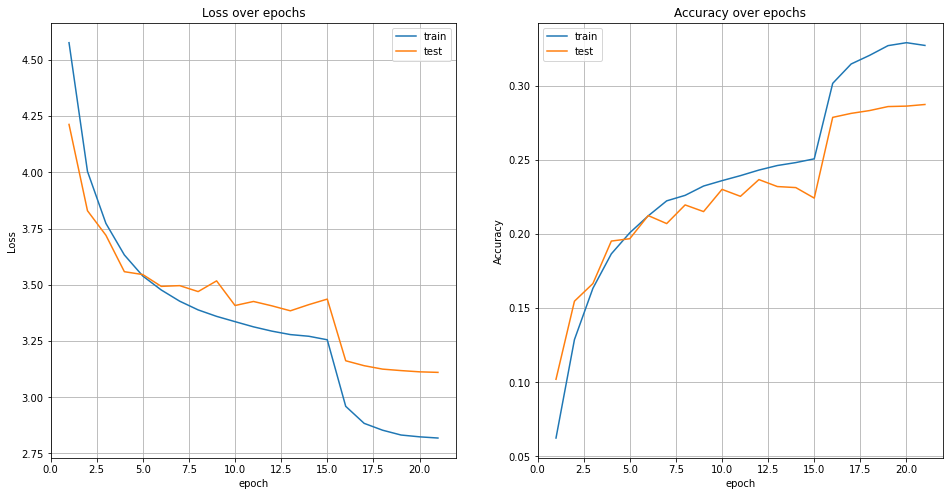

In [ ]:
for _ in range(3):
    trainer_4.end_epoch += 1
    trainer_4.optimizer = torch.optim.Adam(trainer_4.model.parameters(), lr=3e-5)
    trainer_4.DoTestAndTrain(train_loader, val_loader)
    if trainer_4.test_accuracies[-1] > 0.45:
        break

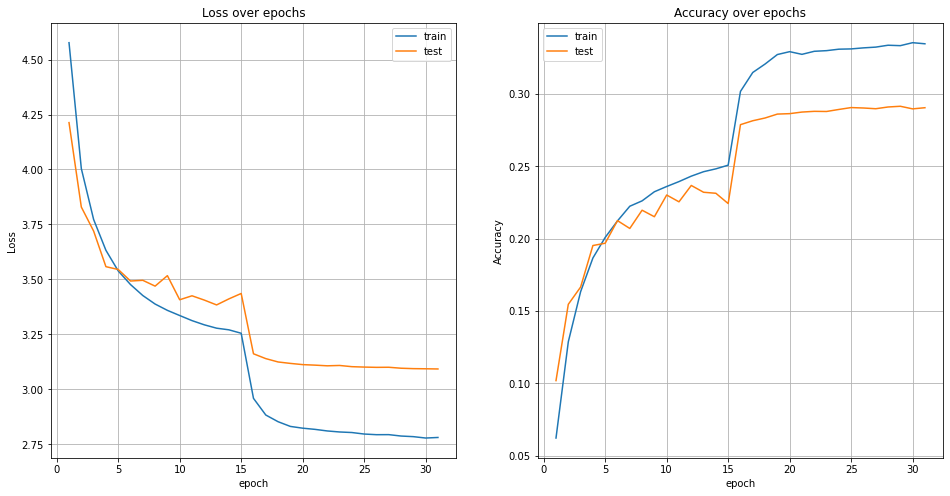

In [ ]:
trainer_4.end_epoch += 10
trainer_4.DoTestAndTrain(train_loader, val_loader)

In [ ]:
all_losses, predicted_labels, true_labels = trainer_4.Test(val_loader)
assert len(predicted_labels) == len(val_set)
accuracy_first_task = accuracy_score(true_labels.cpu(), predicted_labels.cpu())
clear_output()
print(f'Оценка за часть 1 задание составит '\
      f'{np.clip(10 * accuracy_first_task / 0.44, 0, 10):.2f} баллов')

Оценка за часть 1 задание составит 6.60 баллов


#### Эксперемент 5.

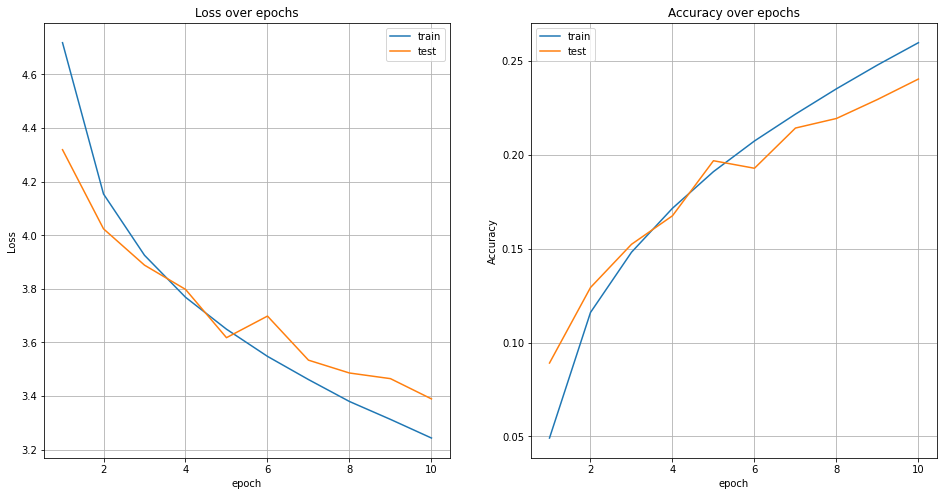

In [ ]:
device = SetupDevice()
model = HugeConvNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
criterion = nn.CrossEntropyLoss()
trainer_5 = GradTrainer(model, device, optimizer, criterion, scheduler, cnt_epochs=10)
trainer_5.DoTestAndTrain(train_loader, val_loader)

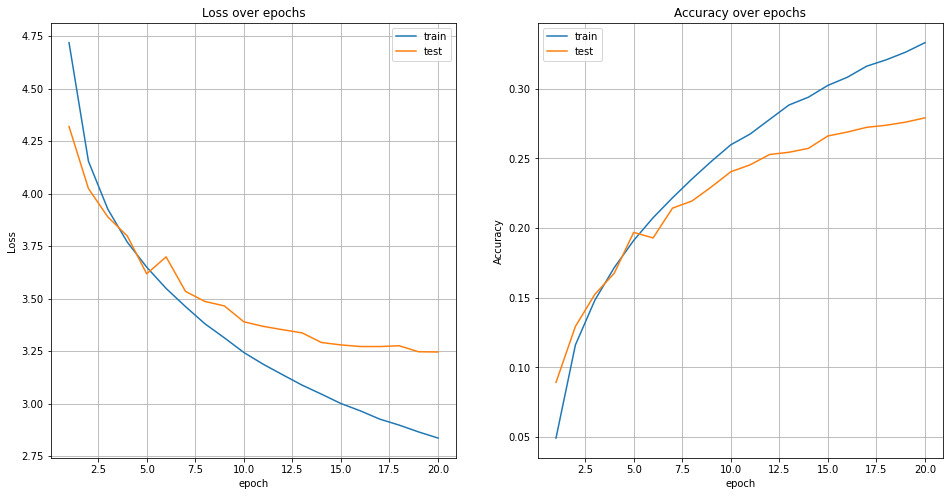

In [ ]:
trainer_5.end_epoch += 10
trainer_5.DoTestAndTrain(train_loader, val_loader)

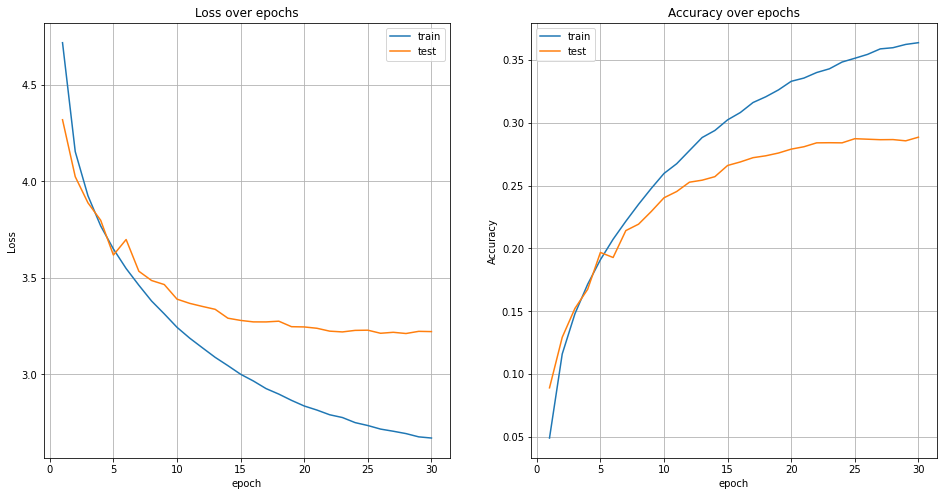

In [ ]:
trainer_5.end_epoch += 10
trainer_5.DoTestAndTrain(train_loader, val_loader)

In [ ]:
all_losses, predicted_labels, true_labels = trainer_5.Test(val_loader)
assert len(predicted_labels) == len(val_set)
accuracy_first_task = accuracy_score(true_labels.cpu(), predicted_labels.cpu())
clear_output()
print(f'Оценка за часть 1 задание составит '\
      f'{np.clip(10 * accuracy_first_task / 0.44, 0, 10):.2f} баллов')

Оценка за часть 1 задание составит 6.56 баллов


#### Эксперемент 6.

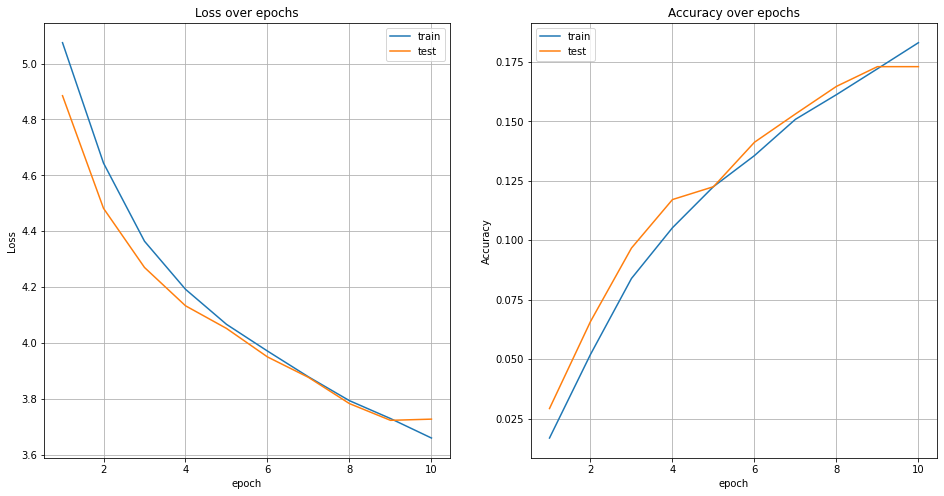

In [18]:
device = SetupDevice()
model = HugestConvNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
criterion = nn.CrossEntropyLoss()
trainer_6 = GradTrainer(model, device, optimizer, criterion, scheduler, cnt_epochs=10)
trainer_6.DoTestAndTrain(train_loader, val_loader)

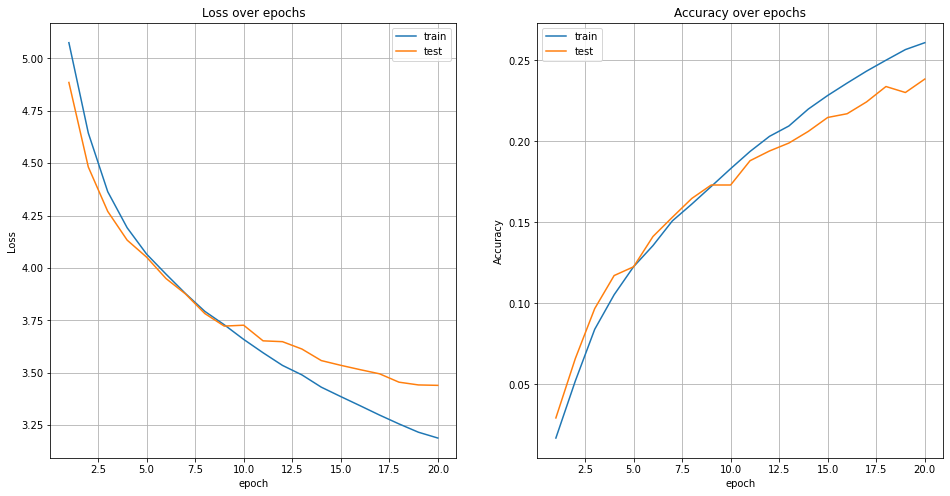

In [19]:
trainer_6.end_epoch += 10
trainer_6.DoTestAndTrain(train_loader, val_loader)

#### Эксперемент 7.

In [10]:
train_loader_64 = torch.utils.data.DataLoader(train_set, batch_size=64, pin_memory=True, num_workers=4, shuffle=True)
val_loader_64 = torch.utils.data.DataLoader(val_set, batch_size=64, pin_memory=True, num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


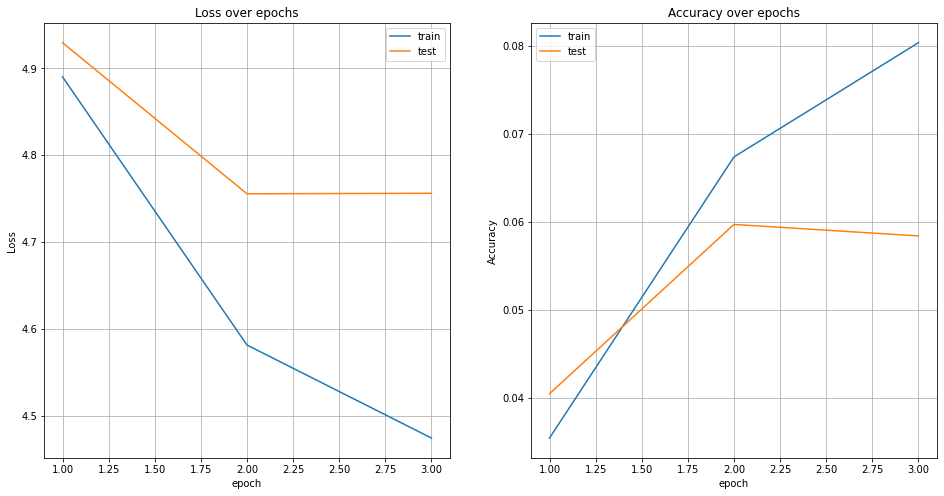

Training 4/10:   0%|          | 0/1563 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


KeyboardInterrupt: ignored

In [62]:
device = SetupDevice()
model = SomeGoogleNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
criterion = nn.CrossEntropyLoss()
trainer_8 = GradTrainer(model, device, optimizer, criterion, scheduler, cnt_epochs=10)
trainer_8.DoTestAndTrain(train_loader_64, val_loader_64)

### Проверка полученной accuracy

После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, реализуйте и запустите функцию `evaluate`. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

* Я чёт протупил, и удалил модельку сейчас не успеваю, поэтому отпишу здесь что в 4 эксперементе было (6.6).

## Задание 2 (0 баллов, но при невыполнении максимум за все задание — 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

Первым эксперементом было запуститься :)

Дневник нарко...ой...дип лернера конечно:
<br>**Оффтоп** эксперементы 1-3 были с батч сайзом 256.
* Эксперемент 1. Попробуем небольшую нейронку. Из-за затухания попробовал поднять lr в оптимайзере, что помогло. Видимо из-за её размера (или затухания) она не может обучиться сильно и обучается только до 20 эпохи.
* Эксперемент 2. Увеличим нейронку. В целом сильного плюса не дало.
* Эксперемент 3. Попробуем изначально большой lr. Не сходиться.
* Эксперемент 4. Попробуем уменьшить выборку.
* Эксперемент 5. Поменяем модельку, увеличим количество свёрток.
* Эксперемент 6. Попробуем ещё большую модельку.
* Попробуем модельку вдозновленную GoogleNet. (к сожалению как бы я ни старался не получилось что-то хорошее сделать).